In [23]:
!pip install nltk

In [24]:
# Imports
import pandas as pd
import numpy as np
import re
from pathlib import Path

# Graphs
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# NLP
import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  # Ensure this import is present
from nltk.stem import WordNetLemmatizer
import string
from collections import Counter

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Pandas settings
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

[nltk_data] Downloading package punkt to /home/blackbird/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/blackbird/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/blackbird/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/blackbird/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---

In [42]:
DATA_DIR = Path("data")
sp_path = DATA_DIR / "south_park_all_seasons.csv"
slurs_path = DATA_DIR / "english_slurs.csv"

df = pd.read_csv(sp_path)
slurs_df = pd.read_csv(slurs_path)

In [26]:
slurs_df.sample(10)

,insult
1109,pigfukker
537,faggot nob jokeys
1144,pussy lick
95,assholes
1123,porch monkey
660,fucs
980,nigg@s
1373,tadger
197,boner
1578,p*ss off


In [44]:
df['Line'] = df['Line'].str.rstrip('\n') # Remove \n

df.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away."
1,10,1,Kyle,Going away? For how long?
2,10,1,Stan,Forever.
3,10,1,Chef,I'm sorry boys.
4,10,1,Stan,"Chef said he's been bored, so he joining a group called the Super Adventure Club."


---

/tmp/ipykernel_27543/519820188.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




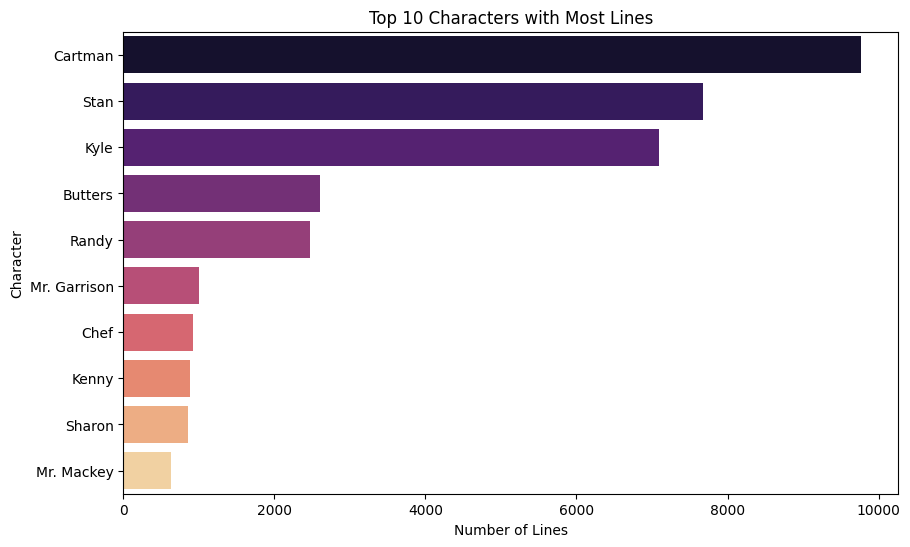

In [28]:
# Group by 'Character'
lines_per_character = df.groupby('Character')['Line'].count().reset_index(name='lines')

top_characters = lines_per_character.nlargest(10, 'lines')

plt.figure(figsize=(10, 6))
sns.barplot(
    x='lines', 
    y='Character', 
    data=top_characters, 
    palette='magma',
)

plt.title('Top 10 Characters with Most Lines')
plt.xlabel('Number of Lines')
plt.ylabel('Character')

plt.show()

---

In [47]:
# Lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Clean text
def tokenize_and_clean(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

df['tokens'] = df['Line'].apply(tokenize_and_clean)

In [32]:
df[['Character', 'Line', 'tokens']].sample(10)

,Character,Line,tokens
7493,Kenny,(Wooooooooo! Woo! Wazzup? Wazzup?),"[wooooooooo, woo, wazzup, wazzup]"
37889,Tweek,"The metaphors, man!","[metaphor, man]"
29927,Kyle,It looks like a UFO.,"[look, like, ufo]"
11752,Stan,You really think he'll die in Somalia?,"[really, think, 'll, die, somalia]"
39802,Jimbo,"Now, Tweek, boxing is a Man sport. There is nothing in the world more Man than boxing. It is Man at his most Man. So when you spar with Ned here, just dig deep into that most Man part of you.","[tweek, boxing, man, sport, nothing, world, man, boxing, man, man, spar, ned, dig, deep, man, part]"
2993,Cartman,And this gives me a Nintendo Wii how?,"[give, nintendo, wii]"
18163,Sharon,"Admit it, Randy! You think it sounds like crap too!","[admit, randy, think, sound, like, crap]"
29861,Terrance,"Hey Phillip, you know what my space suit smells like?","[hey, phillip, know, space, suit, smell, like]"
51867,Stan,"Then damnit man, do it!","[damnit, man]"
3670,Senator 1,Opposed?,[opposed]


/tmp/ipykernel_27543/539254724.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




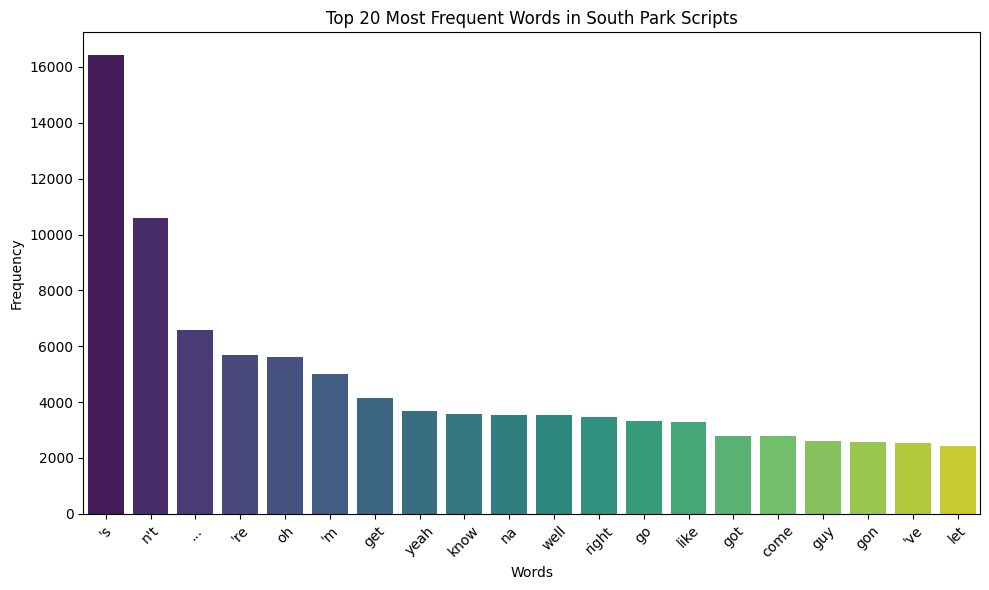

In [33]:
all_tokens = [token for sublist in df['tokens'] for token in sublist]

token_freq = Counter(all_tokens)

top_20_tokens = token_freq.most_common(20)

words, counts = zip(*top_20_tokens)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')

plt.title('Top 20 Most Frequent Words in South Park Scripts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

---

In [48]:
# Filter Cartman's dialogues
cartman_lines = df[df['Character'] == 'Cartman']
cartman_lines.sample(10)

,Season,Episode,Character,Line,tokens
25463,18,9,Cartman,"That's Kyle the Jew again, talking about Call Of Duty to Stan.","['s, kyle, jew, talking, call, duty, stan]"
60821,7,5,Cartman,I'm sure it was just a mistake.,"['m, sure, mistake]"
14130,14,3,Cartman,Good.,[good]
26297,18,3,Cartman,"Wendyl?! Fucking Wendyl?! Grow up, Wendy!","[wendyl, fucking, wendyl, grow, wendy]"
54585,6,1,Cartman,"Well we're supposed to shoot your commercial today, you fat piece of crap!","[well, 're, supposed, shoot, commercial, today, fat, piece, crap]"
1342,10,6,Cartman,This is... bullcrap! If I'm thin- I'm gonna be so... pissed off! Goddammit!,"[..., bullcrap, 'm, thin-, 'm, gon, na, ..., pissed, goddammit]"
54495,6,1,Cartman,"Uuuh, school project.","[uuuh, school, project]"
63856,8,1,Cartman,"Looks like we have a sworn enemy, you guys.","[look, like, sworn, enemy, guy]"
39196,3,2,Cartman,"Hey you guys, I am really pissed off now.","[hey, guy, really, pissed]"
59322,6,17,Cartman,"You guys, we have to bring Christmas to those less fortunate! Now come on!","[guy, bring, christmas, less, fortunate, come]"


In [49]:
insults_list = slurs_df['insult'].str.lower().tolist()

# Count insults in a given list of tokens
def count_insults(tokens, insults_list):
    return [word for word in tokens if word in insults_list]

# Count insults for each of Cartman's lines
cartman_lines.loc[:, 'Insults'] = cartman_lines['tokens'].apply(lambda x: count_insults(x, insults_list))

# Display
cartman_lines[['Character', 'Line', 'Insults']].sample(20)

/tmp/ipykernel_27543/1893348114.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Character,Line,Insults
33485,Cartman,AGGHHH! Let me live! AGGGHHH!,[]
37478,Cartman,Can somebody drive us to the mall?,[]
11414,Cartman,"Jimmy, you really believe that you came up with it all on your own? Oh my God, wait. I totally get it now.",[]
9946,Cartman,"""That was supposed to be my power-up pack, I'm Scott Malkinson and I have diabetes.""",[]
30705,Cartman,"How about we sing ""Kyle's Mom is a Stupid Bitch"", in D minor.",[bitch]
5447,Cartman,Hm. That was... weird.,[]
68003,Cartman,Stupid assholes!,[asshole]
1641,Cartman,"Goddammit! Craig, dude, I ran away from home. You're the first person I came to. I knew you'd take me in off the streets.",[goddammit]
18653,Cartman,"All right men, rally up! There's still a Mexican out there and he ain't gettin' through! You haven't won yet! Game on!",[]
59108,Cartman,"I'm running a business, Stan. Are you my eleven o'clock?",[]


/tmp/ipykernel_27543/2600779189.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




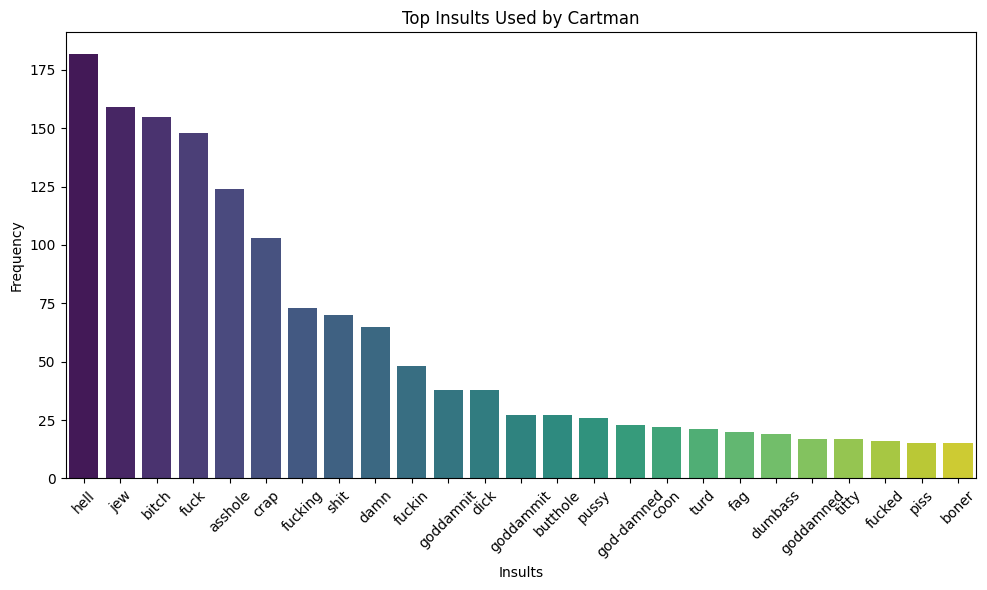

In [50]:
# Flatten list of insults from Cartman's lines
all_insults = [insult for sublist in cartman_lines['Insults'] for insult in sublist]

insult_freq = Counter(all_insults)

top_insults = insult_freq.most_common(25)

insults, counts = zip(*top_insults)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(insults), y=list(counts), palette='viridis')

plt.title("Top Insults Used by Cartman")
plt.xlabel('Insults')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

---

In [51]:
# Filter Stan's dialogues
stan_lines = df[df['Character'] == 'Stan']
stan_lines.sample(10)

,Season,Episode,Character,Line,tokens
69705,9,10,Stan,I can't. I'm busy.,"[ca, n't, 'm, busy]"
55456,6,4,Stan,I don't know.,"[n't, know]"
21728,16,8,Stan,"Whoawhoa, you can't, you can't tell me what to do!","[whoawhoa, ca, n't, ca, n't, tell]"
6718,11,14,Stan,"Dude, Butters, calm down.","[dude, butter, calm]"
36045,2,12,Stan,Yeah.,[yeah]
31002,1,10,Stan,"Bubye, Fartboy.","[bubye, fartboy]"
70715,9,14,Stan,This is sooo embarrassing.,"[sooo, embarrassing]"
25590,18,9,Stan,Tell me about it.,[tell]
40977,3,8,Stan,Oh my God.,"[oh, god]"
3390,10,14,Stan,"Coach, can I talk to you for a second?","[coach, talk, second]"


In [55]:
insults_list = slurs_df['insult'].str.lower().tolist()

# Count insults in a given list of tokens
def count_insults(tokens, insults_list):
    return [word for word in tokens if word in insults_list]

# Count insults for each of Stan's lines
stan_lines.loc[:, 'Insults'] = stan_lines['tokens'].apply(lambda x: count_insults(x, insults_list))

# Display
stan_lines[['Character', 'Line', 'Insults']].sample(20)

,Character,Line,Insults
61441,Stan,"Oh sure. Until the Native Americans decide they want that land, too! What if the Native Americans just keep building their casinos and their highways uh, until we have nowhere else to go?? We have...",[]
45242,Stan,"Mom, Dad, you're not gonna send them back, are you??",[]
59161,Stan,Hey future self.,[]
3797,Stan,"Because it's really, really funny.",[]
59200,Stan,But I have to know for sure.,[]
34330,Stan,"You dumbass, Cartman! That's not the way it happened!",[dumbass]
32774,Stan,I don't know. Let's go see.,[]
69376,Stan,No. I broke the dam.,[dam]
56418,Stan,What do we do now?,[]
58905,Stan,"You see, I learned something today. At first I thought you were all stupid, listening to this douche's advice, but now I understand that you're all here because you're scared. You're scared of dea...","[douche, asshole, douche]"


/tmp/ipykernel_27543/3761217496.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




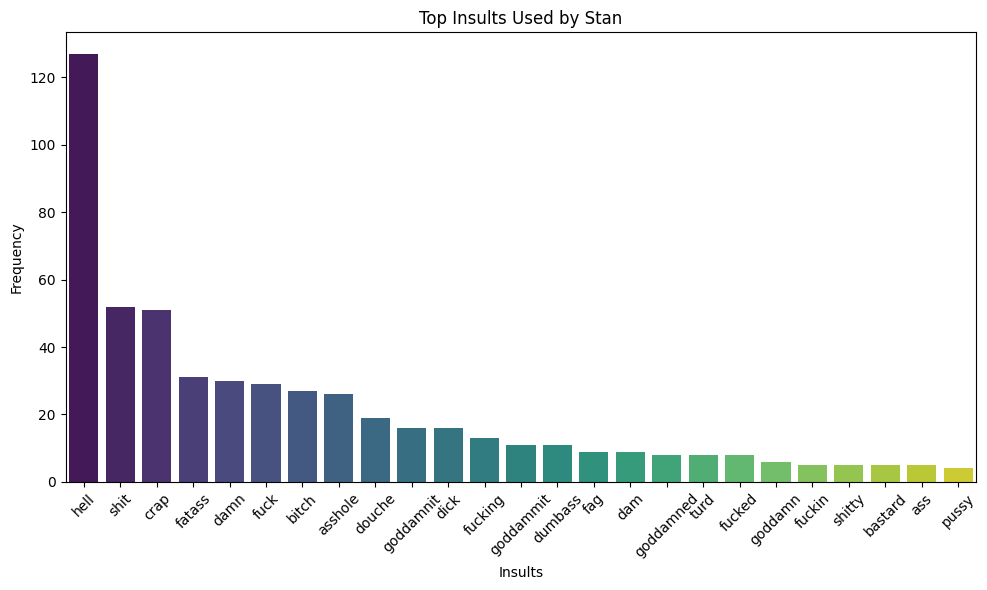

In [57]:
# Flatten list of insults from Stan's lines
all_insults = [insult for sublist in stan_lines['Insults'] for insult in sublist]

insult_freq = Counter(all_insults)

top_insults = insult_freq.most_common(25)

insults, counts = zip(*top_insults)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(insults), y=list(counts), palette='viridis')

plt.title("Top Insults Used by Stan")
plt.xlabel('Insults')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()